# Glider Toolbox Demo Notebook

### Using a Pre-existing config file for a complete pipeline run

Note: Currently these imports are local references. In the future the toolbox will be an installable package through pip.

In [1]:
# add toolbox to src (THIS WILL NOT BE REQUIRED ONCE DEPLOYED)
import sys
from pathlib import Path
src_path = Path("../../src").resolve()

if str(src_path) not in sys.path:
    sys.path.insert(0, str(src_path))

### Pipeline Overview

In [2]:
# from toolbox.pipeline import Pipeline
# pipeline = Pipeline(   
#     "../configs/example_config_doombar.yaml")
# pipeline.run()

#### Building the pipeline one step at a time

In [3]:
# pipeline2 = Pipeline()

# class myCustomStep:
#     def __init__(self, param1, param2):
#         self.param1 = param1
#         self.param2 = param2

#     def run(self, data):
#         # Custom processing logic here
#         print(f"Running custom step with {self.param1} and {self.param2}")
#         return data  # Return processed data

# # add load step
# pipeline2.add_step(
#     "Load OG1",
#     parameters={
#         "file_path": "../../examples/data/OG1/Churchill_647_R.nc",  # Path to the input NetCDF file
#         "add_meta": False, # Add metadata to the data
#         "add_depth": True, # Add depth information to the data
#         "add_elapsed_time": False,
#         "lat_label": "DEPLOYMENT_LATITUDE"},
#     diagnostics=False,
#     run_immediately=True )# can run immediately upon creation

# # add export step
# pipeline2.add_step(
#     "Data Export",
#     parameters={
#         "export_format": "netcdf",  # Define the export format (e.g., OG1, CSV, etc.)
#         "output_path": "../../examples/data/OG1/exported_Churchill_647_R.nc"},
#     diagnostics=False,
#     run_immediately=False )# or run at a future time
# # run last step
# pipeline2.run_last_step()

In [4]:
# conf = pipeline2.export_config("../../examples/data/OG1/Churchill_647_R_CONFIG.yaml")  # Export the pipeline configuration to a YAML file
# conf

# Running Multiple Pipelines

```python

[Discovery] Scanning for step modules in /home/adamwa/Ocean Informatics/Projects/toolbox/src/toolbox/steps/custom
[Discovery] Importing step module: toolbox.steps.custom.derive_ctd
[Discovery] Importing step module: toolbox.steps.custom.export
[Discovery] Importing step module: toolbox.steps.custom.load_data
[Discovery] Importing step module: toolbox.steps.custom.argo_qc
[Discovery] Importing step module: toolbox.steps.custom.calibration
[Discovery] Importing step module: toolbox.steps.custom.find_profiles
[Discovery] Importing step module: toolbox.steps.custom.gen_data
[Discovery] Importing step module: toolbox.steps.custom.variables.salinity
[Discovery] Registered step: Derive CTD
[Discovery] Registered step: Data Export
[Discovery] Registered step: Load OG1
[Discovery] Registered step: Argo QC
[Discovery] Registered step: Find Profiles
[Discovery] Registered step: Generate Data
[Discovery] Registered step: QC: Salinity
[Discovery] Registered step: ADJ: Salinity
Step 'Load OG1' added

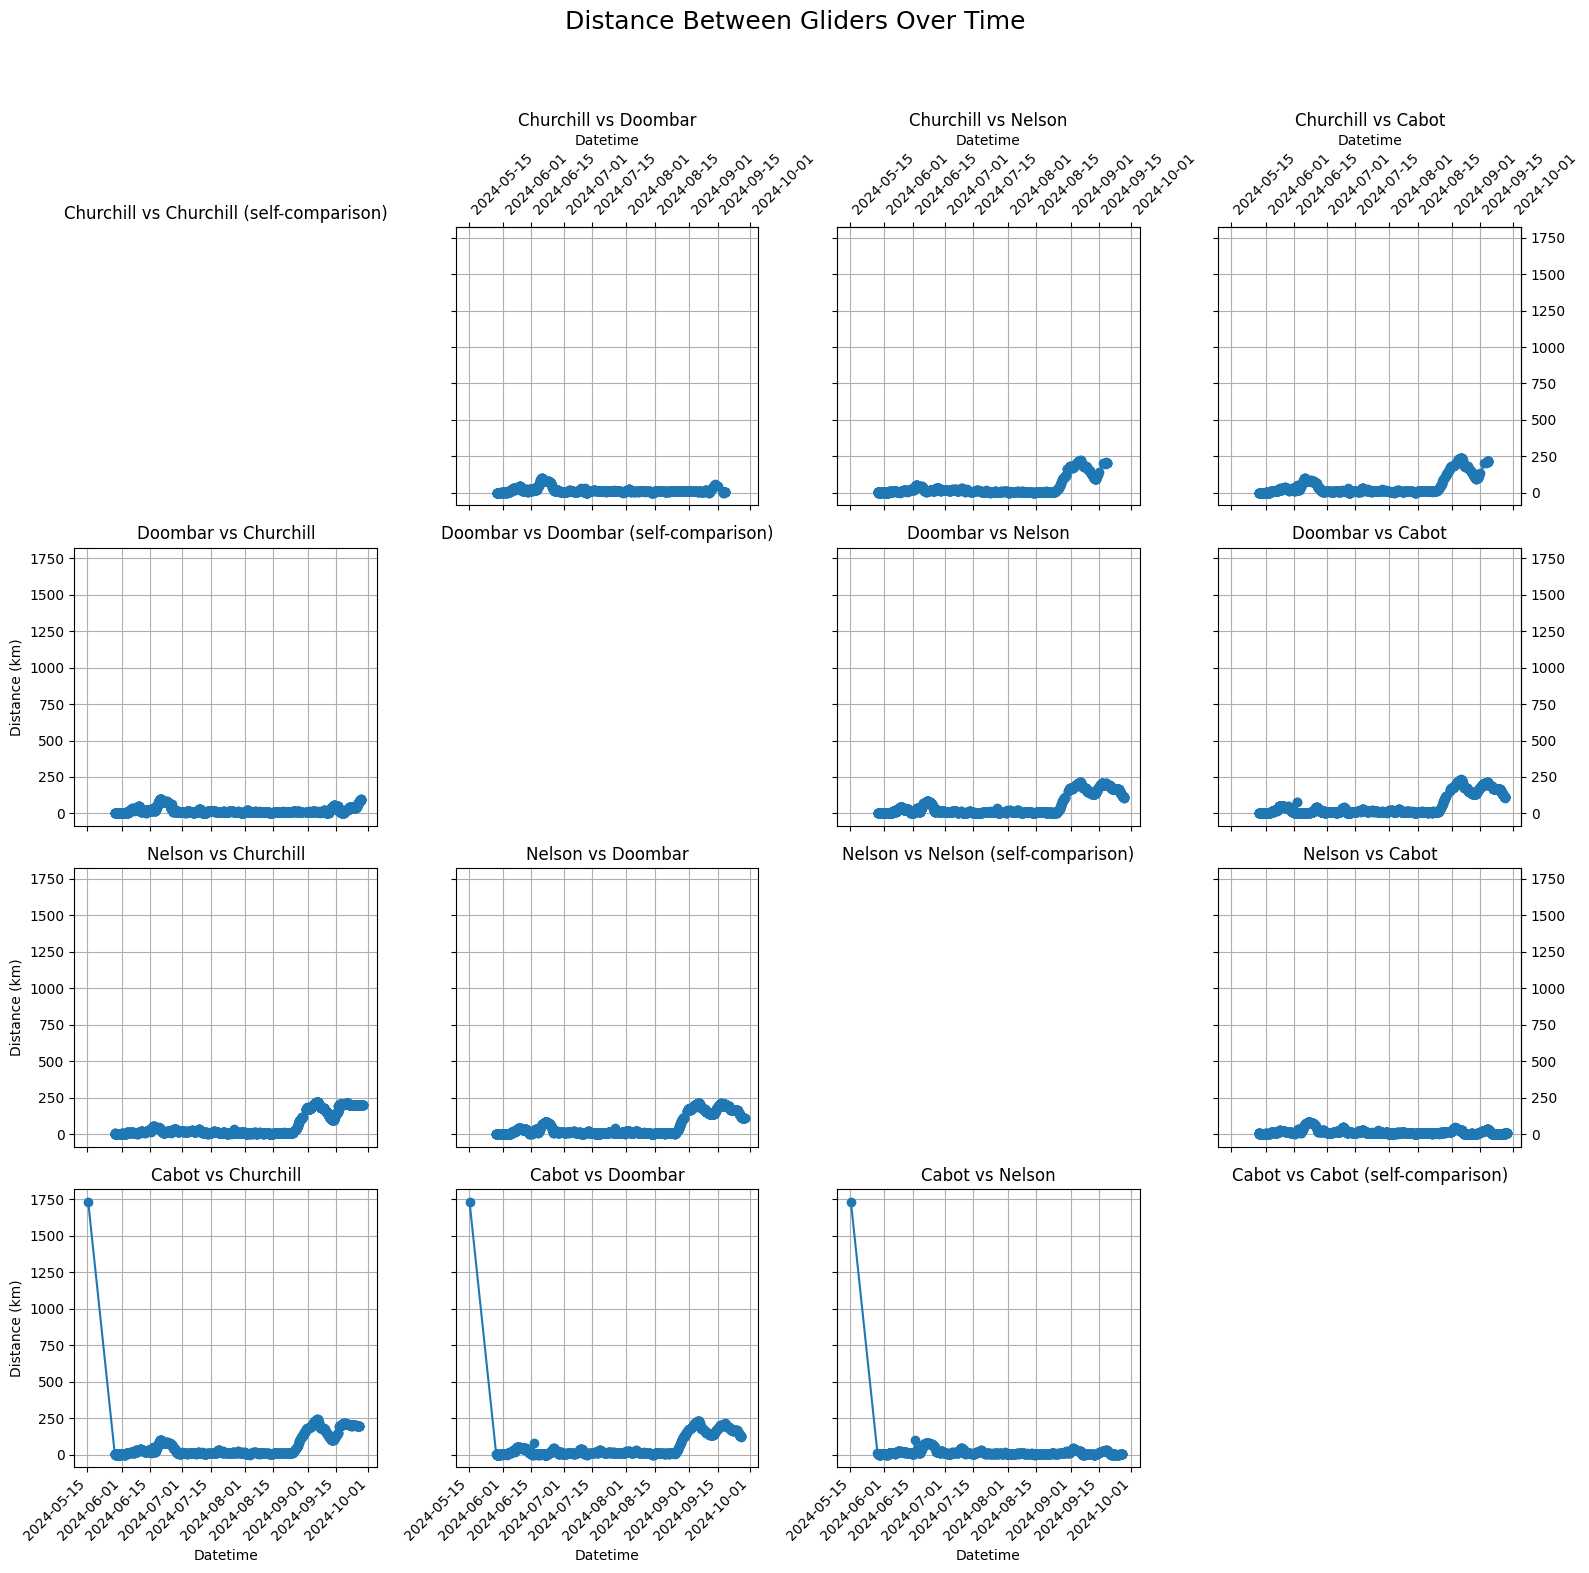

[Pipeline Manager] Finding closest profiles across gliders...


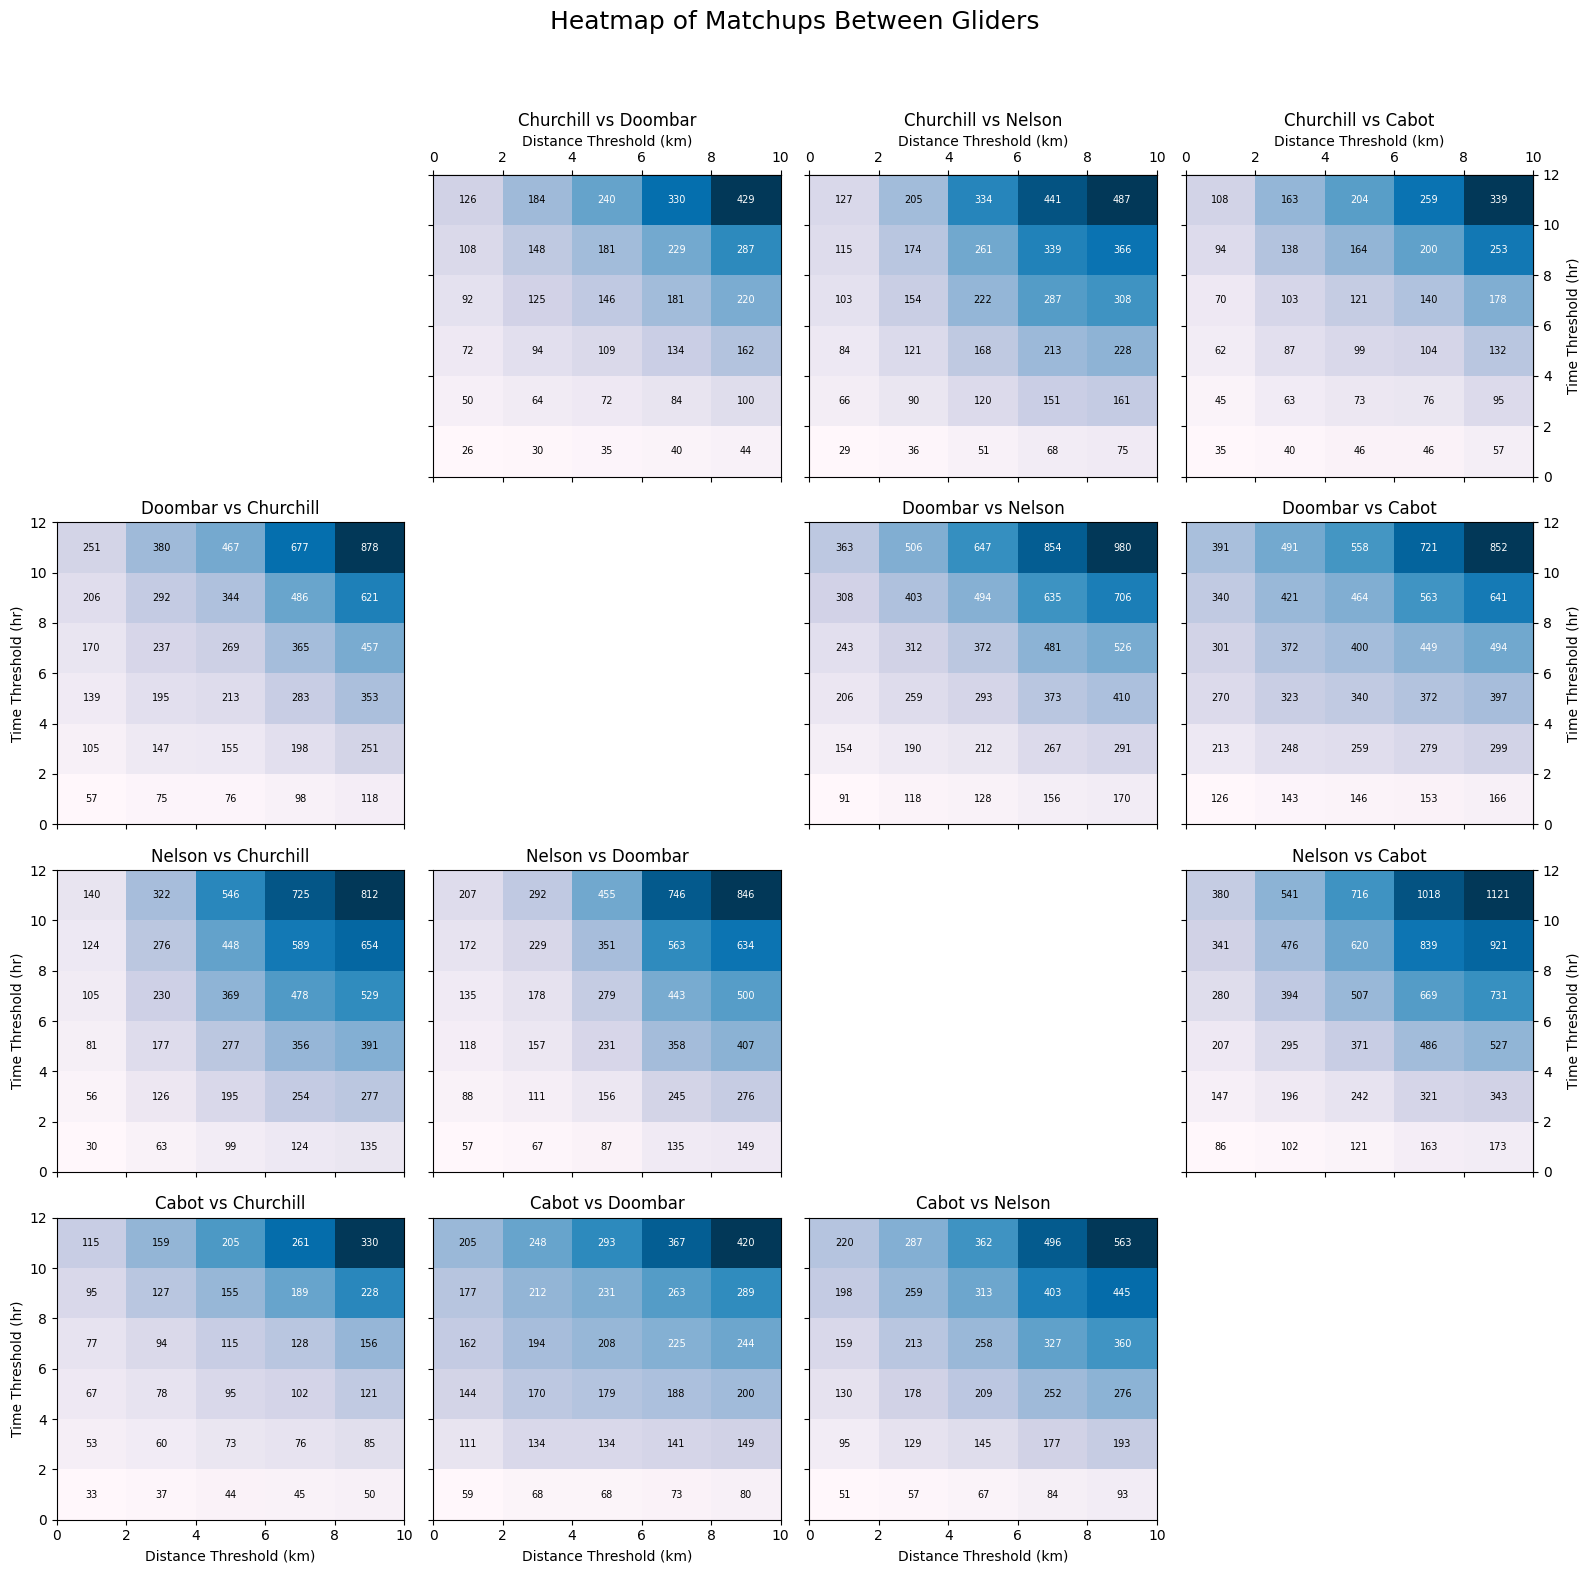

[Pipeline Manager] Heatmap grid plotted in 0 days 00:00:17.484192


In [5]:
### Running multiple pipelines using the PipelineManager class
from toolbox.pipeline import PipelineManager
mngr = PipelineManager()
mngr.load_mission_control("../configs/MissionControl.yaml")  # Load the mission control configuration
# This is currently set up to import data, run profiles, and export data for Doombar and Churchill sources.
mngr.run_all()  # Run all pipelines defined in the mission control configuration
mngr.summarise_all_profiles()

[Pipeline Manager] Interpolating DEPTH for 'Churchill'...
[Pipeline Manager] Interpolating missing DEPTH values by PROFILE_NUMBER...
[Pipeline Manager] Aggregating medians for 'Churchill'...
[Pipeline Manager] Interpolating DEPTH for 'Doombar'...
[Pipeline Manager] Interpolating missing DEPTH values by PROFILE_NUMBER...
[Pipeline Manager] Aggregating medians for 'Doombar'...
[Pipeline Manager] Interpolating DEPTH for 'Nelson'...
[Pipeline Manager] Interpolating missing DEPTH values by PROFILE_NUMBER...
[Pipeline Manager] Aggregating medians for 'Nelson'...
[Pipeline Manager] Interpolating DEPTH for 'Cabot'...
[Pipeline Manager] Interpolating missing DEPTH values by PROFILE_NUMBER...
[Pipeline Manager] Aggregating medians for 'Cabot'...

[Pipeline Manager] Aligning 'Churchill' to target 'Cabot'...
[Pipeline Manager] Found 330 matched profile pairs.
[Filter] Aggregated case: 900 → 326 profiles retained.
[Filter] Resulting dims: FrozenMappingWarningOnValuesAccess({'PROFILE_NUMBER': 326, '

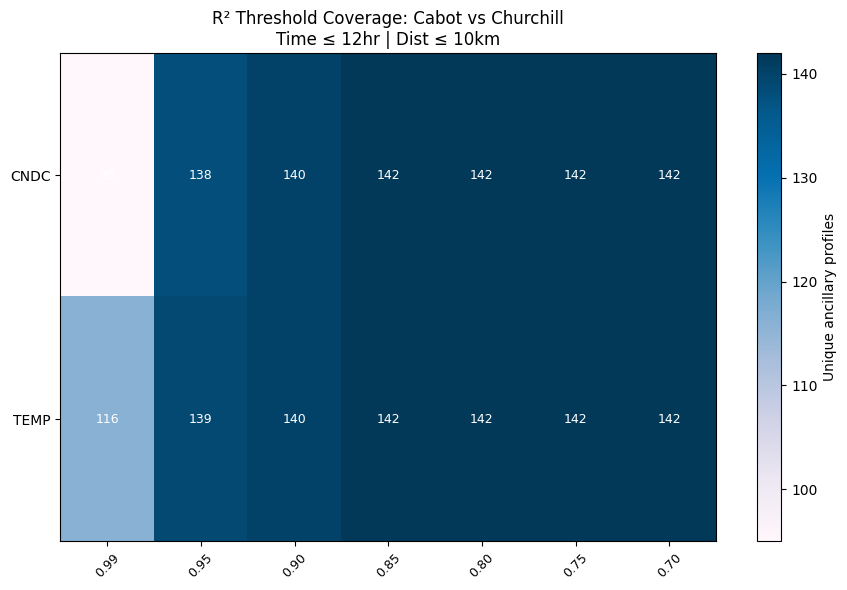

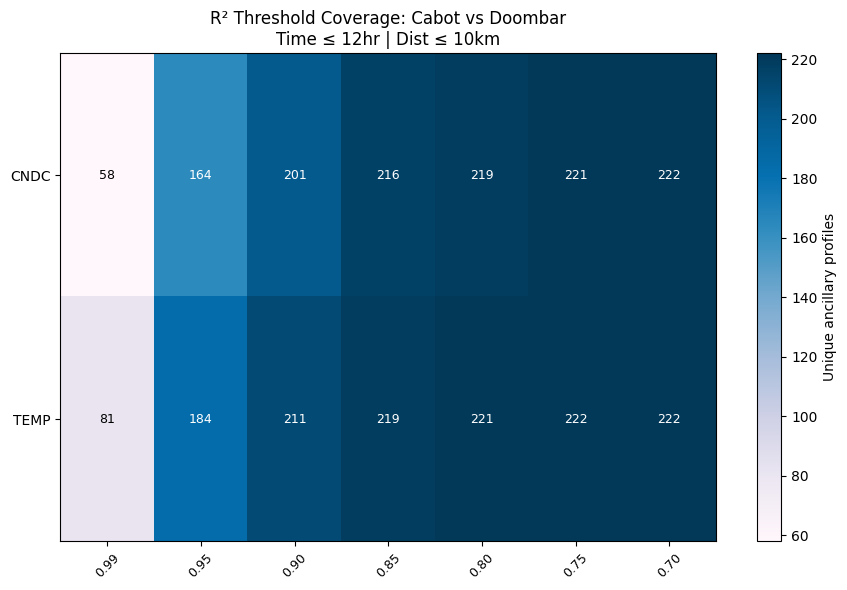

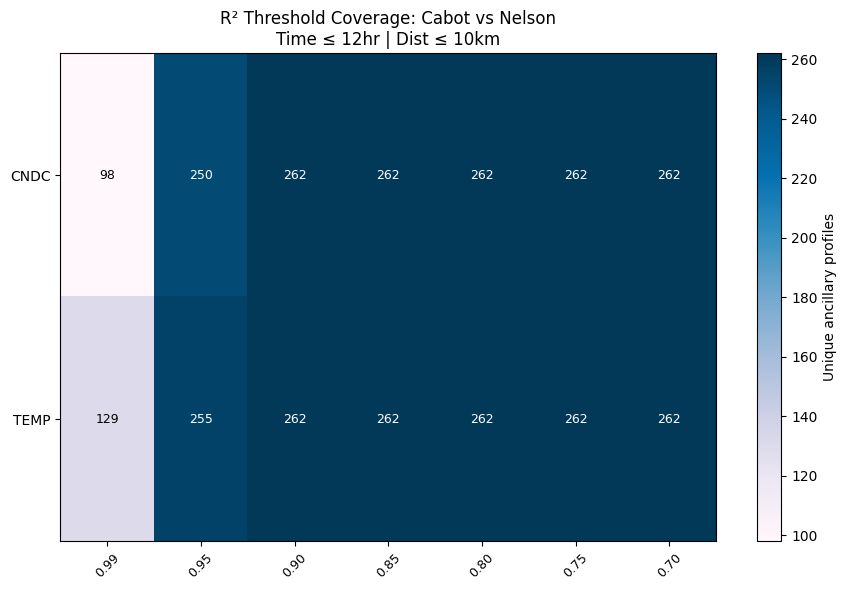

In [6]:
mngr.preview_alignment("Cabot")  # Align data to the target source (e.g., Doombar)

[Fit] Using R² thresholds: {'CNDC': 0.95, 'TEMP': 0.9}
[Fit] Target: Cabot | Ancillaries: ['Churchill', 'Doombar', 'Nelson']
[Fit] Applying fits and saving outputs to: /home/adamwa/Ocean Informatics/Projects/toolbox/examples/notebooks/aligned_outputs_20250920T120035Z

[Fit] === Churchill → align to Cabot ===
[Fit] Churchill:CNDC  slope=0.9831  intercept=0.06673  R²=0.983  N=33630
[Fit] Churchill:TEMP  slope=0.9885  intercept=0.1091  R²=0.986  N=34027
[Fit] Saved: /home/adamwa/Ocean Informatics/Projects/toolbox/examples/notebooks/aligned_outputs_20250920T120035Z/Churchill_aligned_to_Cabot.nc

[Fit] === Doombar → align to Cabot ===
[Fit] Doombar:CNDC  slope=0.9843  intercept=0.06159  R²=0.979  N=27624
[Fit] Doombar:TEMP  slope=0.9899  intercept=0.0847  R²=0.981  N=32015
[Fit] Saved: /home/adamwa/Ocean Informatics/Projects/toolbox/examples/notebooks/aligned_outputs_20250920T120035Z/Doombar_aligned_to_Cabot.nc

[Fit] === Nelson → align to Cabot ===
[Fit] Nelson:CNDC  slope=0.9957  intercep

{'paths': {'Churchill': '/home/adamwa/Ocean Informatics/Projects/toolbox/examples/notebooks/aligned_outputs_20250920T120035Z/Churchill_aligned_to_Cabot.nc',
  'Doombar': '/home/adamwa/Ocean Informatics/Projects/toolbox/examples/notebooks/aligned_outputs_20250920T120035Z/Doombar_aligned_to_Cabot.nc',
  'Nelson': '/home/adamwa/Ocean Informatics/Projects/toolbox/examples/notebooks/aligned_outputs_20250920T120035Z/Nelson_aligned_to_Cabot.nc'},
 'fits': {'Churchill': {'CNDC': {'slope': 0.9830694198608398,
    'intercept': 0.0667271614074707,
    'r2': 0.9830177426338196,
    'n': 33630},
   'TEMP': {'slope': 0.9885367751121521,
    'intercept': 0.10913610458374023,
    'r2': 0.9861676096916199,
    'n': 34027}},
  'Doombar': {'CNDC': {'slope': 0.9843194484710693,
    'intercept': 0.06158638000488281,
    'r2': 0.9793376922607422,
    'n': 27624},
   'TEMP': {'slope': 0.9899166822433472,
    'intercept': 0.08469963073730469,
    'r2': 0.9808392524719238,
    'n': 32015}},
  'Nelson': {'CNDC'

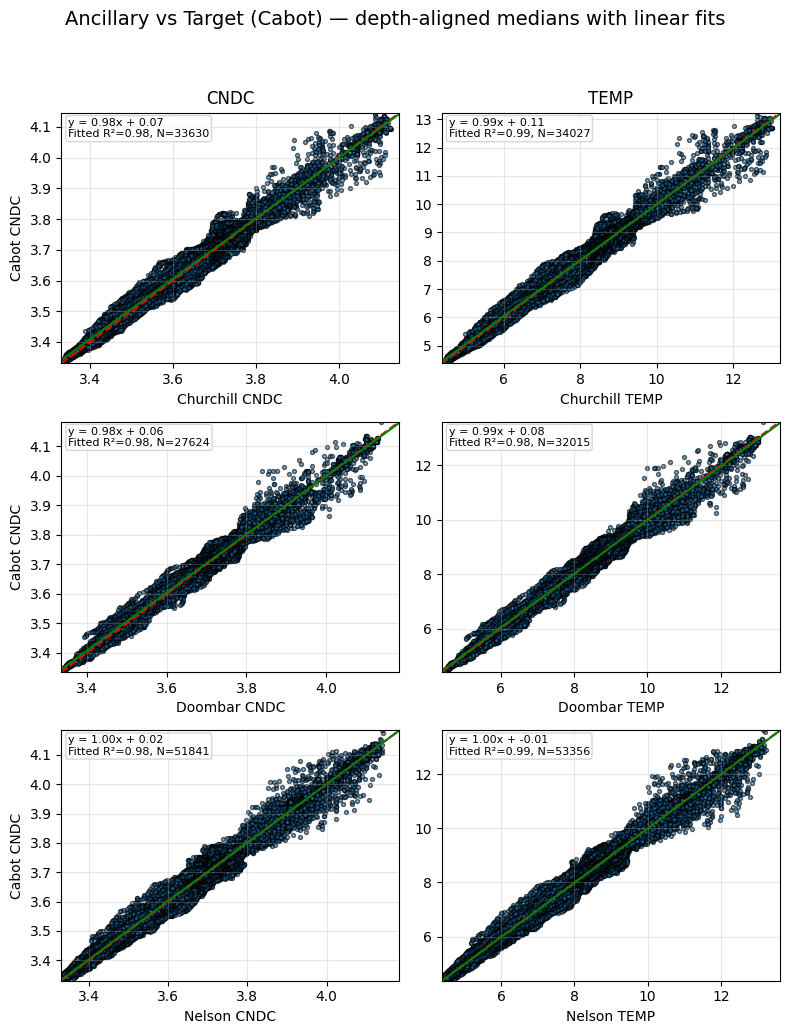

In [7]:
mngr.fit_to_target("Cabot")  # Fit data to the target source (e.g., Doombar)

[Device] Loaded 53 files → 22379 rows, 53 profiles.
Variables: n_unity, nrows1, ncols1, pad_variable, altimeter, asal1, asal2, cond1, cond2, fluor, latitude, longitude, oxygen1, oxygen2, par, potemp1, potemp2, press, psal1, psal2, pumps, scan, temp1, temp2, time, transmittance, turbidity, TEMP, CNDC, psal, potemp, asal, oxygen, depth, TIME, LATITUDE, LONGITUDE, DEPTH
[Validation] Matched 123 pairs with CTD DY180.
[Pipeline Manager] Interpolating missing DEPTH values by PROFILE_NUMBER...
[Filter] Aggregated case: 900 → 121 profiles retained.
[Filter] Resulting dims: FrozenMappingWarningOnValuesAccess({'PROFILE_NUMBER': 121, 'DEPTH_bin': 202})
[Filter] Aggregated case: 53 → 16 profiles retained.
[Filter] Resulting dims: FrozenMappingWarningOnValuesAccess({'PROFILE_NUMBER': 16, 'DEPTH_bin': 202})
[Validation] Dropped 2 target profiles with no aggregated data.
[Validation] Merged data has 121 pairs.


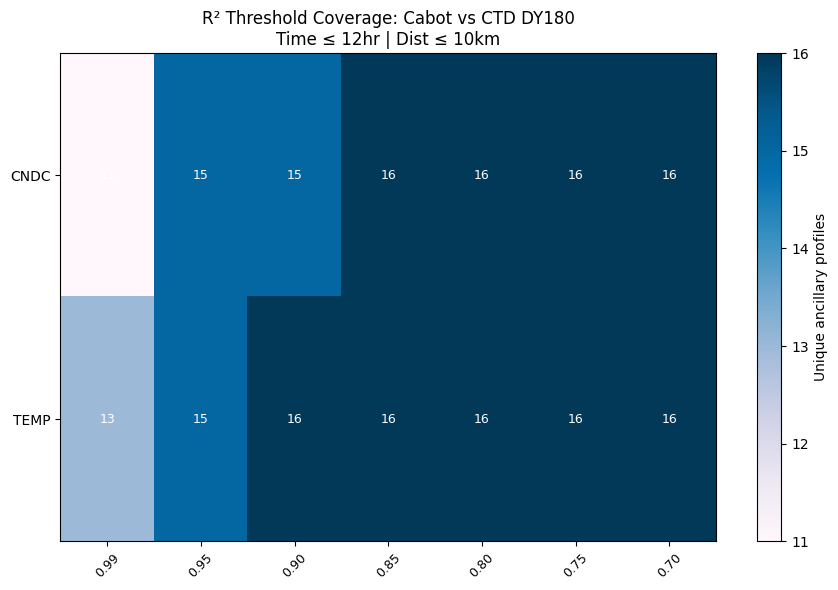

In [8]:
mngr.validate_with_device("Cabot")

[Fit→Device] Using device='CTD DY180', variables=['CNDC', 'TEMP']
[Fit→Device] R² thresholds: {'CNDC': 0.95, 'TEMP': 0.9}
[Device] Loaded 53 files → 22379 rows, 53 profiles.
Variables: n_unity, nrows1, ncols1, pad_variable, altimeter, asal1, asal2, cond1, cond2, fluor, latitude, longitude, oxygen1, oxygen2, par, potemp1, potemp2, press, psal1, psal2, pumps, scan, temp1, temp2, time, transmittance, turbidity, TEMP, CNDC, psal, potemp, asal, oxygen, depth, TIME, LATITUDE, LONGITUDE, DEPTH
[Validation] Matched 123 pairs with CTD DY180.
[Pipeline Manager] Interpolating missing DEPTH values by PROFILE_NUMBER...
[Filter] Aggregated case: 900 → 121 profiles retained.
[Filter] Resulting dims: FrozenMappingWarningOnValuesAccess({'PROFILE_NUMBER': 121, 'DEPTH_bin': 202})
[Filter] Aggregated case: 53 → 16 profiles retained.
[Filter] Resulting dims: FrozenMappingWarningOnValuesAccess({'PROFILE_NUMBER': 16, 'DEPTH_bin': 202})
[Validation] Dropped 2 target profiles with no aggregated data.
[Validati

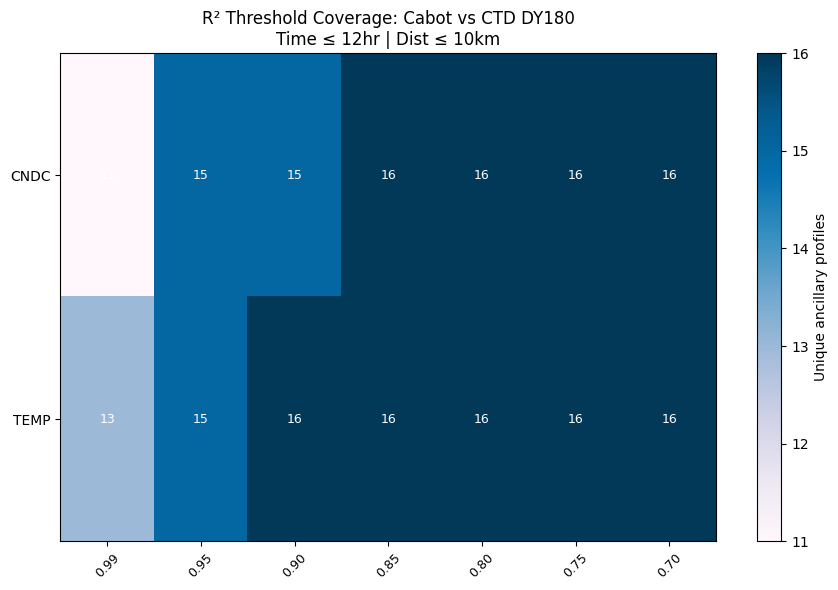

[Fit→Device] CNDC: device ≈ 9.963·target + 0.1243 (R²=0.988, N=11343)
[Fit→Device] TEMP: device ≈ 0.9921·target + 0.08488 (R²=0.987, N=13150)
[Fit→Device] Saved: /home/adamwa/Ocean Informatics/Projects/toolbox/examples/notebooks/device_aligned_Cabot_CTD DY180_20250920T120055Z/Cabot_aligned_to_CTD DY180.nc


{'path': '/home/adamwa/Ocean Informatics/Projects/toolbox/examples/notebooks/device_aligned_Cabot_CTD DY180_20250920T120055Z/Cabot_aligned_to_CTD DY180.nc',
 'fits': {'CNDC': {'slope': 9.9628267288208,
   'intercept': 0.12429428100585938,
   'r2': 0.9875201879422775,
   'n': 11343},
  'TEMP': {'slope': 0.9921309947967529,
   'intercept': 0.08487892150878906,
   'r2': 0.9872446492710126,
   'n': 13150}},
 'device_name': 'CTD DY180'}

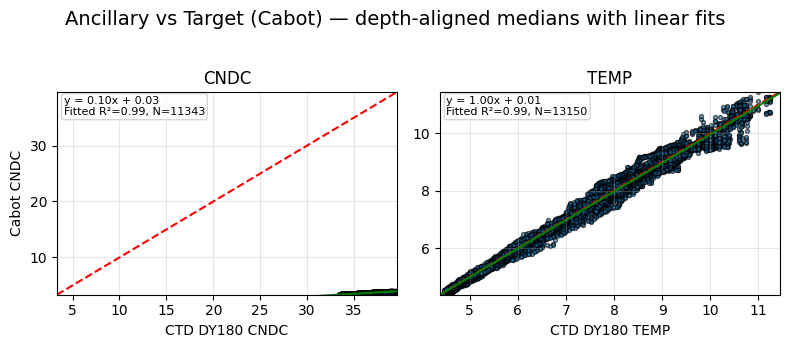

In [9]:
mngr.fit_to_device("Cabot") 